<a href="https://colab.research.google.com/github/zamazingo7/Mushroom_Classification/blob/main/Mushroom_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error,confusion_matrix,accuracy_score
from google.colab import files

## Exploring the original data from Kaggle

In [ ]:
uploaded = files.upload()

Saving mushrooms.csv to mushrooms.csv


In [6]:
#Importing the data and getting a look at the first 5 rows
data = pd.read_csv('/content/mushrooms.csv')
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [3]:
data.shape

(8124, 23)

In [5]:
features = data.columns
features

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [ ]:
#Reviewing the distribution of class, meaning poisonous or edible.

labels = ['Edible', 'Poisonous']
values = [data.describe()['class']['freq'], data.describe()['class']['count']-data.describe()['class']['freq']]
colors = ['yellow', 'blue']

fig = go.Figure(data=[go.Pie(labels=labels, values=values, opacity=1)])
fig.update_traces(textinfo='percent+label', marker=dict(line=dict(color='#000000', width=1), colors=colors))
fig.update_layout(title_text='Mushroom Distribution by Class', title_x=0.5, title_font=dict(size=18))
fig.show()


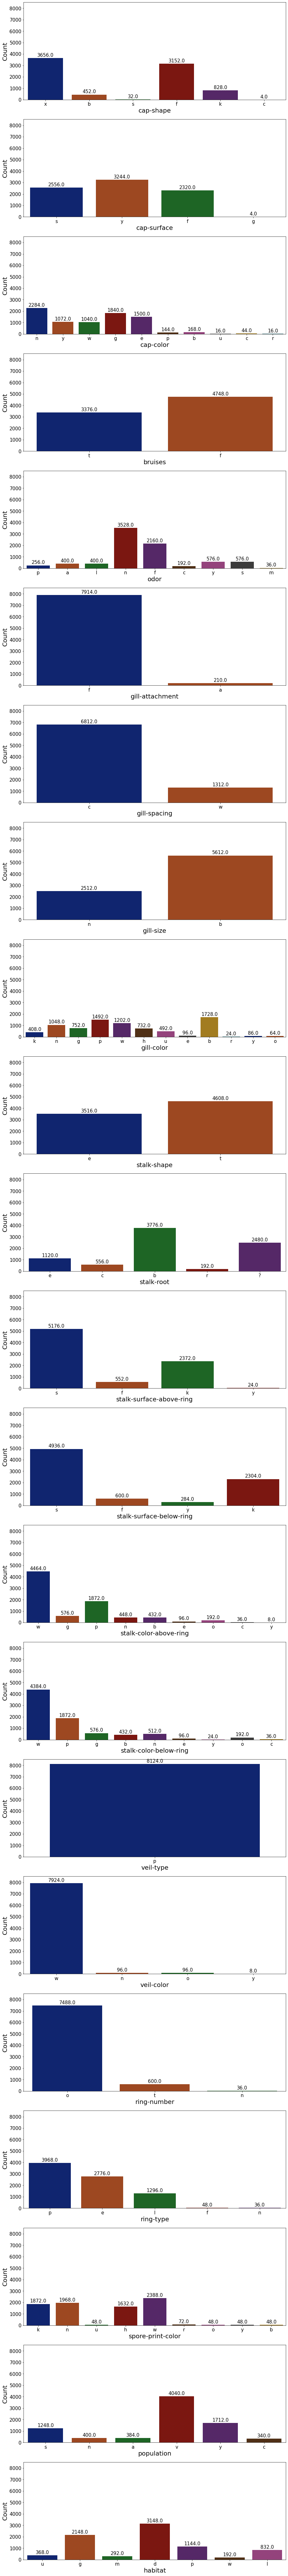

In [ ]:
#PLotting the features to get an overview of the data

f, axes = plt.subplots(22,1, figsize=(15,150), sharey = True) 
k = 1

for i in range(0,22):
    s = sns.countplot(x = features[k], data = data, ax=axes[i], palette = 'dark')
    axes[i].set_xlabel(features[k], fontsize=20)
    axes[i].set_ylabel("Count", fontsize=20)
    axes[i].tick_params(labelsize=15)
    k = k+1
    for p in s.patches:
        s.annotate(format(p.get_height(), '.1f'), 
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha = 'center', va = 'center', 
        xytext = (0, 9), 
        fontsize = 15,
        textcoords = 'offset points')



## Pre-processing the data

In [ ]:
# Checking for missing values

data.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [ ]:
# There are no missing values, so we can move on to preparing the data for testing and training
# Separating the features and the target variable, class 

X=data.drop('class',axis=1)
y=data['class']

# Encoding the categorical values

Encoder_x=LabelEncoder()

for col in X.columns:
    X[col]=Encoder_x.fit_transform(X[col])

Encoder_y=LabelEncoder()
y=Encoder_y.fit_transform(y)

X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,3,2,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,2,2,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,2,2,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,3,2,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,3,2,2,7,7,0,2,1,0,3,0,1


In [ ]:
data['class']

0       p
1       e
2       e
3       p
4       e
       ..
8119    e
8120    e
8121    e
8122    p
8123    e
Name: class, Length: 8124, dtype: object

In [ ]:
y

array([1, 0, 0, ..., 0, 1, 0])

In [ ]:
# We can see that 1 corresponds to poisonous and 0 to edible

In [ ]:
#Splitting the data for training and testing

train_x,test_x,train_y,test_y=train_test_split(X,y)
train_x.head()



,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
4490,2,0,9,0,2,1,0,0,2,0,1,1,1,6,4,0,2,1,2,1,5,0
2805,2,3,2,1,5,1,0,0,10,1,1,2,2,7,6,0,2,1,4,2,5,0
7257,3,3,4,0,2,1,0,1,0,1,0,1,1,6,7,0,2,1,0,7,4,0
5953,3,2,2,1,5,1,0,0,1,0,0,2,2,2,2,0,2,2,0,7,1,6
7057,3,2,2,0,7,1,0,1,0,1,0,2,1,7,7,0,2,1,0,7,4,2


In [ ]:
print(train_y)

[1 0 1 ... 0 0 0]


In [ ]:
test_x.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
7155,3,2,4,0,8,1,0,1,0,1,0,1,2,7,6,0,2,1,0,7,4,2
5420,2,2,5,1,5,1,0,0,1,0,0,2,2,2,7,0,2,2,0,7,1,6
5914,5,3,5,1,5,1,0,0,1,0,0,2,2,7,7,0,2,2,0,7,1,6
2689,5,3,3,1,5,1,0,0,10,1,1,2,2,6,7,0,2,1,4,2,4,0
4808,5,0,9,0,2,1,0,0,3,0,1,1,1,4,4,0,2,1,2,1,4,1


## Using Random Forest Classifier and evaluating the model

In [ ]:
#Importing and training the RFC model

model=RandomForestClassifier(random_state=1)
model.fit(train_x,train_y)

#Predicting the test data
pred=model.predict(test_x)

In [ ]:
#Getting the accuracy score
print("Model score:",model.score(test_x,test_y))
print("Mean absolute error:",mean_absolute_error(pred,test_y))
print("Accuracy score:",accuracy_score(pred,test_y))


Model score: 1.0
Mean absolute error: 0.0
Accuracy score: 1.0


In [ ]:
# Reviewing predictions for the first 5 mushrooms

X.head()
print(model.predict(X.head()))

[1 0 0 1 0]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names



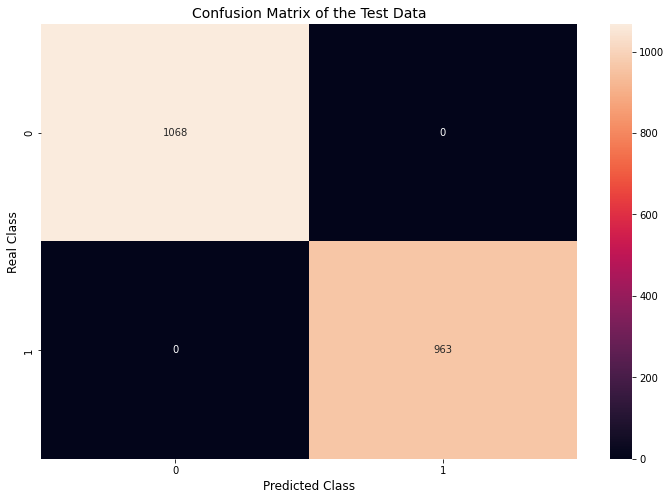

In [ ]:
# Confusion matrix of the test data

rf = RandomForestClassifier(oob_score=True)
rf.fit(train_x, train_y)

predictions_rf = pd.DataFrame(rf.predict(test_x))
plt.figure(figsize=(12, 8))
conf_mat = confusion_matrix(y_true=test_y, y_pred=predictions_rf[0])
sns.heatmap(conf_mat, annot=True, fmt='g')
plt.title('Confusion Matrix of the Test Data', fontsize=14)
plt.ylabel('Real Class', fontsize=12)
plt.xlabel('Predicted Class', fontsize=12)
plt.show()


## Adding a new mushroom to the dataset
As an example Russula Roseipes features have been chosen

In [ ]:
#@title Choose each feature to add a new mushroom to the dataset
Edible_or_poisonous = 'edible' #@param ['edible', 'poisonous']
Cap_shape = 'convex' #@param ['bell', 'conical', 'convex', 'flat', 'knobbed', 'sunken']
Cap_surface = 'smooth' #@param ['fibrous', 'grooves', 'scaly', 'smooth']
Cap_color = 'pink' #@param ['brown', 'buff', 'cinnamon', 'gray', 'green', 'pink', 'purple', 'red', 'white', 'yellow']
Bruises = 'bruises' #@param ['bruises', 'no']
Odor = 'none' #@param ['almond', 'anise', 'creosote', 'fishy', 'foul', 'musty', 'none', 'pungent', 'spicy']
Gill_attachment = 'attached' #@param['attached', 'descending', 'free', 'notched']
Gill_spacing = 'close' #@param['close', 'crowded', 'distant']
Gill_size = 'broad' #@param['broad', 'narrow']
Gill_color = 'white' #@param ['black', 'brown', 'buff', 'chocolate', 'gray', 'green', 'orange', 'pink', 'purple', 'red', 'white', 'yellow']
Stalk_shape = 'enlarging' #@param ['enlarging', 'tapering']
Stalk_root = 'club' #@param['bulbous', 'club', 'cup', 'equal', 'rhizomorphs', 'rooted', 'missing']
Stalk_surface_above_ring = 'smooth' #@param['fibrous', 'scaly', 'silky', 'smooth']
Stalk_surface_below_ring = 'smooth' #@param['fibrous', 'scaly', 'silky', 'smooth']
Stalk_color_above_ring = 'white' #@param['brown', 'buff', 'cinnamon', 'gray', 'orange', 'pink', 'red', 'white', 'yellow']
Stalk_color_below_ring = 'pink' #@param['brown', 'buff', 'cinnamon', 'gray', 'orange', 'pink', 'red', 'white', 'yellow']
Veil_type = 'partial' #@param['partial', 'universal']
Veil_color = 'white' #@param['brown', 'orange', 'white', 'yellow']
Ring_number = 'none' #@param['none', 'one', 'two']
Ring_type = 'none' #@param['cobwebby', 'evanescent', 'flaring', 'large', 'none', 'pendant', 'sheathing', 'zone']
Spore_print_color = 'yellow' #@param ['black', 'brown', 'buff', 'chocolate', 'green', 'orange', 'purple', 'white', 'yellow']
Population = 'several' #@param['abundant', 'clustered', 'numerous', 'scattered', 'several', 'solitary']
Habitat = 'woods' #@param['grasses', 'leaves', 'meadows', 'paths', 'urban', 'waste', 'woods']

In [ ]:
# Making a dictionary of features, as well as the class
Features = {1: {'edible': 'e', 'poisonous': 'p'},
            2: {'bell': 'b', 'conical': 'c', 'convex': 'x', 'flat': 'f', 'knobbed': 'k', 'sunken': 's'},
            3: {'fibrous': 'f', 'grooves': 'g', 'scaly': 'y', 'smooth': 's'},
            4: {'brown': 'n', 'buff': 'b', 'cinnamon': 'c', 'gray': 'g', 'green': 'r', 'pink': 'p', 'purple': 'u', 'red': 'e', 'white': 'w', 'yellow': 'y'},
            5: {'bruises': 't', 'no': 'f'},
            6: {'almond': 'a', 'anise': 'l', 'creosote': 'c', 'fishy': 'y', 'foul': 'f', 'musty': 'm', 'none': 'n', 'pungent':'p', 'spicy': 's'},
            7: {'attached': 'a', 'descending': 'd', 'free': 'f', 'notched': 'n'},
            8: {'close': 'c', 'crowded': 'w', 'distant': 'd'},
            9: {'broad': 'b', 'narrow': 'n'},
            10: {'black': 'k', 'brown': 'n', 'buff': 'b', 'chocolate': 'h', 'gray': 'g', 'green': 'r', 'orange': 'o', 'pink': 'p', 'purple': 'u', 'red': 'e', 'white': 'w', 'yellow': 'y'},
            11: {'enlarging': 'e', 'tapering': 't'},
            12: {'bulbous': 'b', 'club': 'c', 'cup': 'u', 'equal': 'e', 'rhizomorphs': 'z', 'rooted': 'r', 'missing': '?'},
            13: {'fibrous': 'f', 'scaly': 'y', 'silky': 'k', 'smooth': 's'},
            14: {'fibrous': 'f', 'scaly': 'y', 'silky': 'k', 'smooth': 's'},
            15: {'brown': 'n', 'buff': 'b', 'cinnamon': 'c', 'gray': 'g', 'orange': 'o', 'pink': 'p', 'red': 'e', 'white': 'w', 'yellow': 'y'},
            16: {'brown': 'n', 'buff': 'b', 'cinnamon': 'c', 'gray': 'g', 'orange': 'o', 'pink': 'p', 'red': 'e', 'white': 'w', 'yellow': 'y'},
            17: {'partial': 'p', 'universal': 'u'},
            18: {'brown': 'n', 'orange': 'o', 'white': 'w', 'yellow': 'y'},
            19: {'none': 'n', 'one': 'o', 'two': 't'},
            20: {'cobwebby': 'c', 'evanescent': 'e', 'flaring': 'f', 'large': 'l', 'none': 'n', 'pendant': 'p', 'sheathing': 's', 'zone': 'z'},
            21: {'black': 'k', 'brown': 'n', 'buff': 'b', 'chocolate': 'h', 'green': 'r', 'orange': 'o', 'purple': 'u', 'white': 'w', 'yellow': 'y'},
            22: {'abundant': 'a', 'clustered': 'c', 'numerous': 'n', 'scattered': 's', 'several': 'v', 'solitary': 'y'},
            23: {'grasses': 'g', 'leaves': 'l', 'meadows': 'm', 'paths': 'p', 'urban': 'u','waste': 'w', 'woods': 'd'}}


print(Features)

{1: {'edible': 'e', 'poisonous': 'p'}, 2: {'bell': 'b', 'conical': 'c', 'convex': 'x', 'flat': 'f', 'knobbed': 'k', 'sunken': 's'}, 3: {'fibrous': 'f', 'grooves': 'g', 'scaly': 'y', 'smooth': 's'}, 4: {'brown': 'n', 'buff': 'b', 'cinnamon': 'c', 'gray': 'g', 'green': 'r', 'pink': 'p', 'purple': 'u', 'red': 'e', 'white': 'w', 'yellow': 'y'}, 5: {'bruises': 't', 'no': 'f'}, 6: {'almond': 'a', 'anise': 'l', 'creosote': 'c', 'fishy': 'y', 'foul': 'f', 'musty': 'm', 'none': 'n', 'pungent': 'p', 'spicy': 's'}, 7: {'attached': 'a', 'descending': 'd', 'free': 'f', 'notched': 'n'}, 8: {'close': 'c', 'crowded': 'w', 'distant': 'd'}, 9: {'broad': 'b', 'narrow': 'n'}, 10: {'black': 'k', 'brown': 'n', 'buff': 'b', 'chocolate': 'h', 'gray': 'g', 'green': 'r', 'orange': 'o', 'pink': 'p', 'purple': 'u', 'red': 'e', 'white': 'w', 'yellow': 'y'}, 11: {'enlarging': 'e', 'tapering': 't'}, 12: {'bulbous': 'b', 'club': 'c', 'cup': 'u', 'equal': 'e', 'rhizomorphs': 'z', 'rooted': 'r', 'missing': '?'}, 13: {'

In [ ]:
# Array of the chosen features
Xcat = [Edible_or_poisonous, Cap_shape, Cap_surface, Cap_color, Bruises, Odor, Gill_attachment, Gill_spacing, Gill_size, Gill_color, Stalk_shape, Stalk_root, Stalk_surface_above_ring, Stalk_surface_below_ring, Stalk_color_above_ring, Stalk_color_below_ring, Veil_type, Veil_color, Ring_number, Ring_type, Spore_print_color, Population, Habitat]
print(Xcat)
print(len(Xcat))

['edible', 'conical', 'grooves', 'gray', 'no', 'musty', 'notched', 'distant', 'narrow', 'black', 'enlarging', 'bulbous', 'fibrous', 'fibrous', 'gray', 'brown', 'partial', 'white', 'none', 'cobwebby', 'black', 'clustered', 'grasses']
23


In [ ]:
# Function to access each of the chosen features' categorical value 
def find_key(name):
  for key, val in Features.items():
    for key2, val2 in val.items():
      if key2 == name:
        return val2


In [ ]:
#Making an array out of those values
new_mush = []
for item in Xcat:
  new_mush.append(find_key(item))

print(len(new_mush))

23


In [ ]:
# Create dataframe with the right columns from the dataset and add the array as a row 
new_df = pd.DataFrame([new_mush], columns=data.columns)
new_df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,e,x,s,p,t,n,a,c,b,w,e,c,s,s,w,p,p,w,n,n,y,v,d


In [ ]:
# Adding the new mushroom as a row to the data, new mushroom is added everytime this is run
data = data.append(new_df, ignore_index=True)

data.shape

(8125, 23)

In [ ]:
#Export the updated dataset
data.to_csv("/content/mushrooms_new.csv")

## Inputting mushroom characteristics and obtaining a classification through the RFC model

In [ ]:
#@title Please choose one feature for each category
Cap_shape = 'conical' #@param ['bell', 'conical', 'convex', 'flat', 'knobbed', 'sunken']
Cap_surface = 'grooves' #@param ['fibrous', 'grooves', 'scaly', 'smooth']
Cap_color = 'gray' #@param ['brown', 'buff', 'cinnamon', 'gray', 'green', 'pink', 'purple', 'red', 'white', 'yellow']
Bruises = 'no' #@param ['bruises', 'no']
Odor = 'musty' #@param ['almond', 'anise', 'creosote', 'fishy', 'foul', 'musty', 'none', 'pungent', 'spicy']
Gill_attachment = 'notched' #@param['attached', 'descending', 'free', 'notched']
Gill_spacing = 'distant' #@param['close', 'crowded', 'distant']
Gill_size = 'narrow' #@param['broad', 'narrow']
Gill_color = 'black' #@param ['black', 'brown', 'buff', 'chocolate', 'gray', 'green', 'orange', 'pink', 'purple', 'red', 'white', 'yellow']
Stalk_shape = 'enlarging' #@param ['enlarging', 'tapering']
Stalk_root = 'bulbous' #@param['bulbous', 'club', 'cup', 'equal', 'rhizomorphs', 'rooted', 'missing']
Stalk_surface_above_ring = 'fibrous' #@param['fibrous', 'scaly', 'silky', 'smooth']
Stalk_surface_below_ring = 'fibrous' #@param['fibrous', 'scaly', 'silky', 'smooth']
Stalk_color_above_ring = 'gray' #@param['brown', 'buff', 'cinnamon', 'gray', 'orange', 'pink', 'red', 'white', 'yellow']
Stalk_color_below_ring = 'brown' #@param['brown', 'buff', 'cinnamon', 'gray', 'orange', 'pink', 'red', 'white', 'yellow']
Veil_type = 'partial' #@param['partial', 'universal']
Veil_color = 'white' #@param['brown', 'orange', 'white', 'yellow']
Ring_number = 'none' #@param['none', 'one', 'two']
Ring_type = 'cobwebby' #@param['cobwebby', 'evanescent', 'flaring', 'large', 'none', 'pendant', 'sheathing', 'zone']
Spore_print_color = 'black' #@param ['black', 'brown', 'buff', 'chocolate', 'green', 'orange', 'purple', 'white', 'yellow']
Population = 'clustered' #@param['abundant', 'clustered', 'numerous', 'scattered', 'several', 'solitary']
Habitat = 'grasses' #@param['grasses', 'leaves', 'meadows', 'paths', 'urban', 'waste', 'woods']

In [ ]:
Xcat2 = [Cap_shape, Cap_surface, Cap_color, Bruises, Odor, Gill_attachment, Gill_spacing, Gill_size, Gill_color, Stalk_shape, Stalk_root, Stalk_surface_above_ring, Stalk_surface_below_ring, Stalk_color_above_ring, Stalk_color_below_ring, Veil_type, Veil_color, Ring_number, Ring_type, Spore_print_color, Population, Habitat]
print(Xcat2)
print(type(Xcat2))

['conical', 'grooves', 'gray', 'no', 'musty', 'notched', 'distant', 'narrow', 'black', 'enlarging', 'bulbous', 'fibrous', 'fibrous', 'gray', 'brown', 'partial', 'white', 'none', 'cobwebby', 'black', 'clustered', 'grasses']
<class 'list'>


In [ ]:
def find_key(name):
  for key, val in Features.items():
    for key2, val2 in val.items():
      if key2 == name:
        return val2

In [ ]:
pred_mush = []
for item in Xcat2:
  pred_mush.append(find_key(item))

print(pred_mush)

['c', 'g', 'g', 'f', 'm', 'n', 'd', 'n', 'k', 'e', 'b', 'f', 'f', 'g', 'n', 'p', 'w', 'n', 'c', 'k', 'c', 'g']


In [ ]:
pred_mush=Encoder_x.fit_transform(pred_mush)
print(pred_mush)

[ 1  5  5  4  7  8  2  8  6  3  0  4  4  5  8  9 10  8  1  6  1  5]


In [ ]:
# Create dataframe
pred_df = pd.DataFrame([pred_mush], columns=X.columns)
pred_df.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,5,4,7,8,2,8,6,3,0,4,4,5,8,9,10,8,1,6,1,5


In [ ]:
# Make a prediction
new_pred = model.predict(pred_df)

if new_pred[0] == 0:
  print('Mushroom is edible')

elif new_pred[0] == 1:
  print('Do not eat this mushroom')

Do not eat this mushroom
